In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics, svm
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import catboost
from catboost import CatBoostClassifier

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/javingles/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/javingles/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/javingles/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#Buenas prácticas, guardamos archivo de texto en una variable
df = pd.read_csv('youtoxic_english_1000.csv')

In [4]:
#Leemos las primeras 5 filas 
df.head(5)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#Leemos las últimas 5 filas 
df.tail(5)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video is so racist,False,False,False,False,False,False,False,False,False,False,False,False
999,UgjBJKQSoQMQ6ngCoAEC,XRuCW80L9mA,"God, the narrator has such an annoying lisp.",False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# formato de los datos
df.dtypes

CommentId          object
VideoId            object
Text               object
IsToxic              bool
IsAbusive            bool
IsThreat             bool
IsProvocative        bool
IsObscene            bool
IsHatespeech         bool
IsRacist             bool
IsNationalist        bool
IsSexist             bool
IsHomophobic         bool
IsReligiousHate      bool
IsRadicalism         bool
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [8]:
# Conocer datos nulos
df.isnull().sum()

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [9]:
# Datos estadísticos
df.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [10]:
# Descripción de columnas
df.columns

Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')

In [11]:
#Buscando duplicados
df.duplicated().sum()

0

In [12]:
#imprimiendo correlación de variables
df.corr()

,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
IsToxic,1.000000,0.797086,0.158048,0.472718,0.359707,0.431774,0.407869,0.096908,0.034142,NaN,0.118928,NaN
IsAbusive,0.797086,1.000000,0.198282,0.593057,0.451277,-0.119603,-0.121005,-0.042843,0.042833,NaN,-0.042970,NaN
IsThreat,0.158048,0.198282,1.000000,0.106626,-0.048820,0.002063,-0.034268,-0.013152,-0.004634,NaN,0.111962,NaN
IsProvocative,0.472718,0.593057,0.106626,1.000000,0.089788,-0.072719,-0.075072,-0.008796,-0.013860,NaN,0.001699,NaN
IsObscene,0.359707,0.451277,-0.048820,0.089788,1.000000,-0.027061,-0.035277,-0.029934,0.094916,NaN,-0.036736,NaN
IsHatespeech,0.431774,-0.119603,0.002063,-0.072719,-0.027061,1.000000,0.944637,0.224442,0.079074,NaN,0.275440,NaN
IsRacist,0.407869,-0.121005,-0.034268,-0.075072,-0.035277,0.944637,1.000000,0.237595,-0.011958,NaN,0.013885,NaN
IsNationalist,0.096908,-0.042843,-0.013152,-0.008796,-0.029934,0.224442,0.237595,1.000000,-0.002841,NaN,-0.009897,NaN
IsSexist,0.034142,0.042833,-0.004634,-0.013860,0.094916,0.079074,-0.011958,-0.002841,1.000000,NaN,-0.003487,NaN
IsHomophobic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Datos a la vista

In [13]:
# Establecer el porcentaje de una columna de datos de visualización
def porcentaje_grafico(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
                   ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords="offset points")

Categoría del comentario:

IsToxic
False    538
True     462
Name: IsToxic, dtype: int64

IsAbusive
False    647
True     353
Name: IsAbusive, dtype: int64

IsThreat
False    979
True      21
Name: IsThreat, dtype: int64

IsProvocative
False    839
True     161
Name: IsProvocative, dtype: int64

IsObscene
False    900
True     100
Name: IsObscene, dtype: int64

IsHatespeech
False    862
True     138
Name: IsHatespeech, dtype: int64

IsRacist
False    875
True     125
Name: IsRacist, dtype: int64

IsNationalist
False    992
True       8
Name: IsNationalist, dtype: int64

IsSexist
False    999
True       1
Name: IsSexist, dtype: int64

IsHomophobic
False    1000
Name: IsHomophobic, dtype: int64

IsReligiousHate
False    988
True      12
Name: IsReligiousHate, dtype: int64

IsRadicalism
False    1000
Name: IsRadicalism, dtype: int64



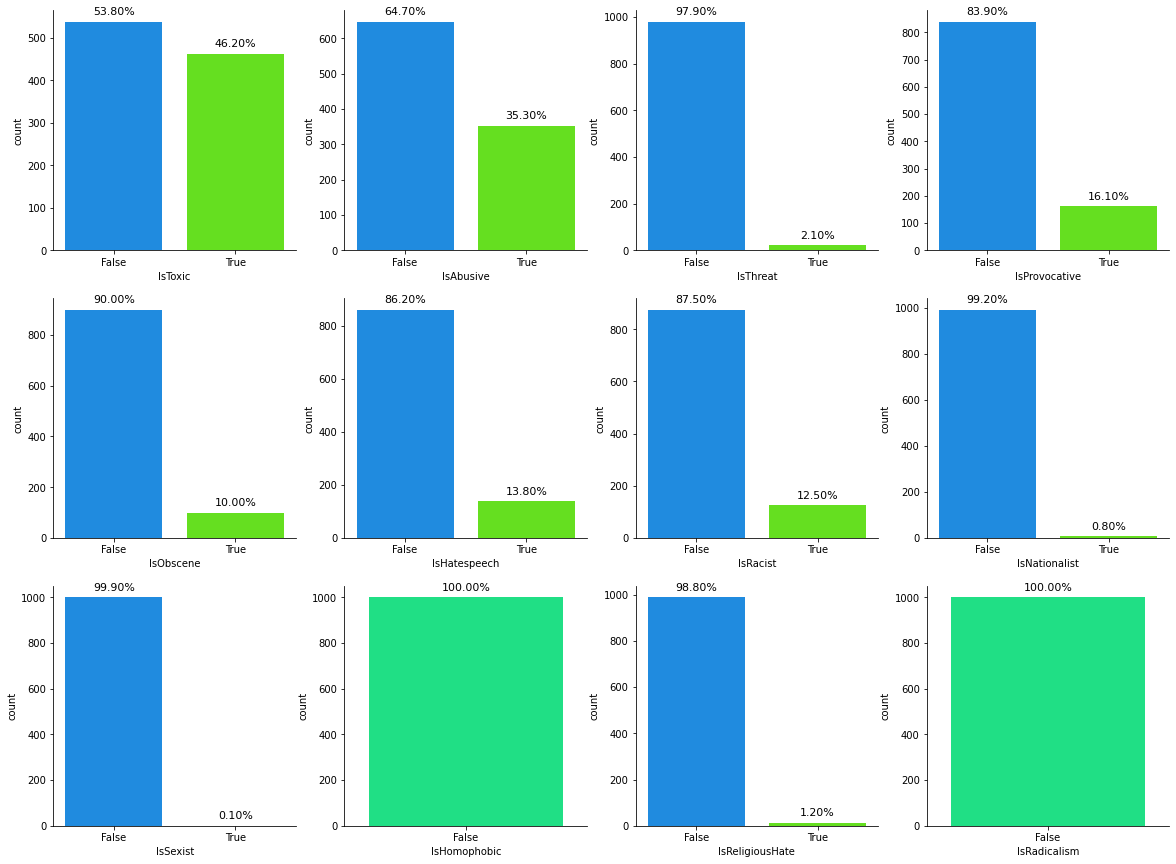

In [14]:
variables_binarias=["IsToxic",'IsAbusive',"IsThreat",  "IsProvocative" , "IsObscene", "IsHatespeech", "IsRacist", "IsNationalist", "IsSexist", "IsHomophobic", "IsReligiousHate", "IsRadicalism" ]
# Conteo de cada una de las categorías.
print(f"Categoría del comentario:")
print()
for col in variables_binarias:
    print(f"{col}")
    print(df[col].value_counts())
    print()

fig,axes=plt.subplots(nrows=3,ncols=4,figsize=(20,15))
for i,item in enumerate(variables_binarias): #enumerate()
    plt.subplot(3,4,(i+1))
    ax = sns.countplot(x=item,data=df,palette="gist_rainbow_r")
    plt.xlabel(str(item))
    #plt.title("Categorias de Toxicidad "+str(item))
    i=i+1
    porcentaje_grafico(ax)
plt.show()

# Número de comentarios por id del video

In [15]:
#como detectar el id de esos repetidos
df.Text.value_counts()

run them over                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [16]:
#número de comentarios por id
df.VideoId.value_counts()

9pr1oE34bIM    274
04kJtp6pVXI    172
cT14IbTDW2c    146
dG7mZQvaQDk    112
TZxEyoplYbI    104
bUgKZMSxr3E     39
8HB18hZrhXc     38
4rCweDxDqdw     37
Dt9-byUhPdg     34
#NAME?          16
dDbRyFIkNII     10
XRuCW80L9mA     10
5vF4si3hoRA      8
Name: VideoId, dtype: int64

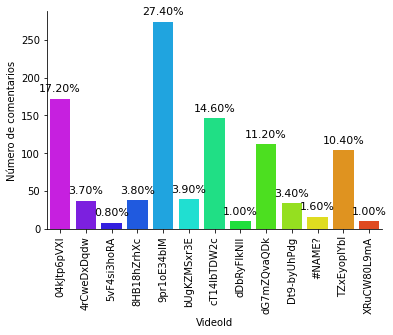

In [17]:
#Resetear el id de Video para que sea mas legible en el grafico
ax = sns.countplot(x="VideoId",data=df, palette="gist_rainbow_r")
plt.ylabel("Número de comentarios")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
    plt.xticks(rotation=90)
plt.show()

In [18]:
#Limpiando el texto
def clean_text(text):
    # make text lowercase
    text = text.lower()
    # removing text within parentheses
    text = re.sub('', '', text)
    # removing numbers
    text = re.sub('\w*\d\w*', '', text)
    # if there's more than 1 whitespace, then make it just 1
    text = re.sub('\s+', ' ', text)
    # if there's a new line, then make it a whitespace
    text = re.sub('\n', ' ', text)
    # removing any quotes
    text = re.sub('\"+', '', text)
    # getting rid of punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    return text

In [19]:
def  abreviaturas(text):
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"r", "", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub("(\W)"," ",text)
    text = re.sub('S*dS*s*','', text)
    return text

In [20]:
def eliminar_emoji(text):
    return emoji.replace_emoji(text, replace='')

In [21]:
clean = lambda x: clean_text(x)

In [22]:
df['clean_text'] = df['Text'].apply(clean)

In [23]:
df.head(5)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,clean_text
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False,if only people would just take a step back and...
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False,law enforcement is not trained to shoot to app...
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False,dont you reckon them black lives matter banne...
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False,there are a very large number of people who do...
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False,the arab dude is absolutely right he should ha...


In [24]:
# Calcular la columna toxico en base a las columnas booleanas
def crear_columna_Toxico(df):
    df_Toxico = []
    """Se crea la columna Toxico, con la condición --> Si alguna de las categorias existentes tiene al menos un True ,
    entonces el valor de la columna Toxico es True ó 1"""
    for row in range(len(df)):
        if df.iloc[row]["IsToxic"] == True or df.iloc[row]["IsAbusive"] == True or df.iloc[row]["IsThreat"] == True or df.iloc[row]["IsProvocative"] == True   or df.iloc[row]["IsObscene"] == True or df.iloc[row]["IsHatespeech"]  == True or df.iloc[row]["IsRacist"] == True    or df.iloc[row]["IsNationalist"] == True or  df.iloc[row]["IsReligiousHate"] == True  or  df.iloc[row]["IsSexist"] == True:
            df_Toxico.append(1)
        else:
            df_Toxico.append(0)
    df["Toxico"] = df_Toxico
    df = df.drop(['IsToxic', 'IsAbusive', 'IsThreat','IsProvocative', 'IsHatespeech', 'IsObscene','IsRacist', 'IsNationalist', 'IsReligiousHate','IsSexist', "CommentId","VideoId",'IsHomophobic', 'IsRadicalism'], axis=1)
    return df

In [25]:
# Se aplica el metodo de crear la Columna Toxico, y se eliminan las otras categorías.
df =crear_columna_Toxico(df)
df.head(5)

,Text,clean_text,Toxico
0,If only people would just take a step back and...,if only people would just take a step back and...,0
1,Law enforcement is not trained to shoot to app...,law enforcement is not trained to shoot to app...,1
2,\nDont you reckon them 'black lives matter' ba...,dont you reckon them black lives matter banne...,1
3,There are a very large number of people who do...,there are a very large number of people who do...,0
4,"The Arab dude is absolutely right, he should h...",the arab dude is absolutely right he should ha...,0


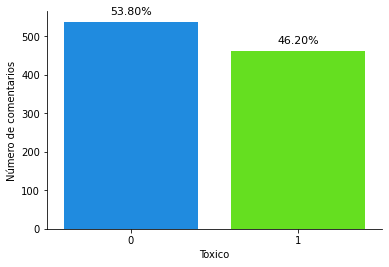

In [26]:
#Visualización de balanceo de datos.
ax = sns.countplot(x="Toxico",data=df, palette="gist_rainbow_r")
plt.ylabel("Número de comentarios")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.show()

In [27]:
#df['Toxico'] = df['Toxico'].replace('Tóxico', 1)
#df['Toxico'] = df['Toxico'].replace('No Tóxico', 0)

In [28]:
df = df[['clean_text', 'Toxico']].copy()

In [29]:
df.head(5)

,clean_text,Toxico
0,if only people would just take a step back and...,0
1,law enforcement is not trained to shoot to app...,1
2,dont you reckon them black lives matter banne...,1
3,there are a very large number of people who do...,0
4,the arab dude is absolutely right he should ha...,0


In [30]:
data = df['clean_text']
target = df['Toxico']

### Comprobando las palabras más frecuentes de versiones limpias y originales de los datos

In [31]:
# Mirando palabras originales
def unfiltered_tokens(text):
    dirty_tokens = nltk.word_tokenize(text)
    return dirty_tokens

In [32]:
# Aplicando esta función a la columna `clean_text` 
unfiltered_data = list(map(unfiltered_tokens, data))

In [33]:
# Convertir esto en una lista legible y obtener las 20 palabras más frecuentes
flat_unfiltered = [item for sublist in unfiltered_data for item in sublist]
dirty_corpus_freqdist = FreqDist(flat_unfiltered)
dirty_corpus_freqdist.most_common(20)

[('the', 1545),
 ('to', 816),
 ('and', 812),
 ('a', 788),
 ('of', 602),
 ('is', 540),
 ('that', 459),
 ('you', 458),
 ('in', 439),
 ('i', 404),
 ('this', 387),
 ('are', 320),
 ('it', 285),
 ('was', 261),
 ('they', 257),
 ('people', 256),
 ('for', 253),
 ('black', 246),
 ('not', 242),
 ('he', 233)]

In [34]:
#Preparándonos para aplicar la stopwords
stop_words = set(stopwords.words('english'))

In [35]:
def process_text(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [36]:
# Aplicando la función anterior a nuestros datos
processed_data = list(map(process_text, data))

In [37]:
# Inicializando nuestro vocabulario
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

4543

In [38]:
# Convertir los datos en una lista legible y obtener las 20 palabras principales
flat_filtered = [item for sublist in processed_data for item in sublist]
clean_corpus_freqdist = FreqDist(flat_filtered)
clean_corpus_freqdist.most_common(20)

[('people', 256),
 ('black', 246),
 ('police', 175),
 ('like', 151),
 ('get', 143),
 ('white', 135),
 ('would', 120),
 ('brown', 104),
 ('dont', 102),
 ('officer', 97),
 ('shot', 92),
 ('cop', 86),
 ('one', 82),
 ('video', 74),
 ('cops', 69),
 ('man', 68),
 ('know', 67),
 ('guy', 61),
 ('racist', 58),
 ('blacks', 57)]

## Lematización

In [39]:
# Creando una lista con todas las salidas lematizadas
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [40]:
X_lem = lemmatized_output
y_lem = target

## Dividir el conjunto de datos en Train-Test y Vectorización

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.20, random_state=15)

# Usando tf_idf vectorizor con bigramas
tfidf = TfidfVectorizer(stop_words= stop_words, ngram_range=(1,2))

In [42]:
tfidf_data_train = tfidf.fit_transform(X_train)
tfidf_data_test = tfidf.transform(X_test)

In [43]:
X_train

['run',
 'michael smerconish little bitch like subtly try insult guy guy laugh really show low cnn stoop garbage hole cnn become piece as sucking work michael smerconish guess wonder home dont watch cnn crap news network',
 'thus collapse usa two possibility considered whereby one boil dictatorship evil reprisal possibility may new reconstruction people fundamentally conscious responsibility attain government really everything bring effective valuable new start whether actually occur currently extremely questionable presently totalitarian manner everything directed towards interest economic military political cultural – well towards strict fundamentalist religioussectarian – based enormous lie devious misanthropic criminal felonious machination every imaginable regard also mean population usa spied upon secret service even severely within neighbourhood forth every possible manner restricted freedom addition violence emerges form openly covertly\ufeff',
 'truck foghorn',
 '’ care protes

# Modelos: SVM, Logistic Regression y Multinomial Naive Bayes

## SVM

In [44]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', class_weight='balanced', random_state=20)

In [45]:
# Ajustando el conjunto de datos al modelo y prediciendo las etiquetas en el conjunto de datos de validación
SVM.fit(tfidf_data_train, y_train)
SVM_test_preds = SVM.predict(tfidf_data_test)

In [46]:
# measuring the performance fo the model by several metrics
SVM_precision = precision_score(y_test, SVM_test_preds)
SVM_recall = recall_score(y_test, SVM_test_preds)
SVM_f1_score = f1_score(y_test, SVM_test_preds)
SVM_accuracy = accuracy_score(y_test, SVM_test_preds)
#SVM_accuracy_train = accuracy_score(y_train, SVM_test_preds)
SVM_weighted_f1_score = f1_score(y_test, SVM_test_preds, average='weighted')

In [47]:
# printing evaluation metrics up to 4th decimal place
print('Precision: {:.4}'.format(SVM_precision))
print('Recall: {:.4}'.format(SVM_recall))
print('F1 Score: {:.4}'.format(SVM_f1_score))
print('Accuracy: {:.4}'.format(SVM_accuracy))
#print('Accuracy_train: {:.4}'.format(SVM_accuracy_train))
print('Weighted F1 Score: {:.4}'.format(SVM_weighted_f1_score))

Precision: 0.6731
Recall: 0.7447
F1 Score: 0.7071
Accuracy: 0.71
Weighted F1 Score: 0.7101


In [48]:
# creating dictionary with all metrics
metric_dict = {}
metric_dict['SVM'] = {'precision': SVM_precision, 'recall': SVM_recall, 'f1_score': SVM_f1_score, 'accuracy':SVM_accuracy}

## Logistic Regression


In [49]:
logreg_baseline = LogisticRegression(penalty='l2', class_weight='balanced', random_state=20)

In [50]:
logreg_baseline.fit(tfidf_data_train, y_train)
logreg_test_preds = logreg_baseline.predict(tfidf_data_test)

In [51]:
logreg_precision = precision_score(y_test, logreg_test_preds)
logreg_recall = recall_score(y_test, logreg_test_preds)
logreg_f1_score = f1_score(y_test, logreg_test_preds)
logreg_accuracy = accuracy_score(y_test, logreg_test_preds)
logreg_weighted_f1_score = f1_score(y_test, logreg_test_preds, average='weighted')

In [52]:
print('Precision: {:.4}'.format(logreg_precision))
print('Recall: {:.4}'.format(logreg_recall))
print('F1 Score: {:.4}'.format(logreg_f1_score))
print('Accuracy: {:.4}'.format(logreg_accuracy))

Precision: 0.6771
Recall: 0.6915
F1 Score: 0.6842
Accuracy: 0.7


In [53]:
metric_dict['Logistic Regression'] = {'precision': logreg_precision, 'recall': logreg_recall, 'f1_score': logreg_f1_score, 'accuracy': logreg_accuracy}

## Multinomial Naive Bayes

In [54]:
bayes = MultinomialNB(alpha = .01)

In [55]:
bayes.fit(tfidf_data_train, y_train)
bayes_test_preds = bayes.predict(tfidf_data_test)

In [56]:
bayes_precision = precision_score(y_test, bayes_test_preds)
bayes_recall = recall_score(y_test, bayes_test_preds)
bayes_f1_score = f1_score(y_test, bayes_test_preds)
bayes_accuracy = accuracy_score(y_test, bayes_test_preds)
bayes_f1_weighted = f1_score(y_test, bayes_test_preds, average='weighted')

In [57]:
print('Precision: {:.4}'.format(bayes_precision))
print('Recall: {:.4}'.format(bayes_recall))
print('F1 Score: {:.4}'.format(bayes_f1_score))
print('Accuracy {:.4}'.format(bayes_accuracy))

Precision: 0.6514
Recall: 0.7553
F1 Score: 0.6995
Accuracy 0.695


In [58]:
metric_dict[ 'Naive Bayes'] = {'precision': bayes_precision, 'recall': bayes_recall, 'f1_score': bayes_f1_score, 'accuracy': bayes_accuracy}

## Catboost

In [60]:
model_CBC = CatBoostClassifier()

In [61]:
model_CBC.fit(tfidf_data_train, y_train)
model_CBC_test_preds = model_CBC.predict(tfidf_data_test)

Learning rate set to 0.009366
0:	learn: 0.6922685	total: 118ms	remaining: 1m 58s
1:	learn: 0.6911919	total: 173ms	remaining: 1m 26s
2:	learn: 0.6906847	total: 241ms	remaining: 1m 20s
3:	learn: 0.6901004	total: 299ms	remaining: 1m 14s
4:	learn: 0.6890788	total: 351ms	remaining: 1m 9s
5:	learn: 0.6879731	total: 411ms	remaining: 1m 8s
6:	learn: 0.6872926	total: 465ms	remaining: 1m 6s
7:	learn: 0.6864896	total: 540ms	remaining: 1m 6s
8:	learn: 0.6856433	total: 621ms	remaining: 1m 8s
9:	learn: 0.6846433	total: 711ms	remaining: 1m 10s
10:	learn: 0.6833250	total: 787ms	remaining: 1m 10s
11:	learn: 0.6819995	total: 878ms	remaining: 1m 12s
12:	learn: 0.6809497	total: 970ms	remaining: 1m 13s
13:	learn: 0.6804090	total: 1.03s	remaining: 1m 12s
14:	learn: 0.6794293	total: 1.11s	remaining: 1m 12s
15:	learn: 0.6782459	total: 1.17s	remaining: 1m 11s
16:	learn: 0.6771509	total: 1.24s	remaining: 1m 11s
17:	learn: 0.6762962	total: 1.3s	remaining: 1m 10s
18:	learn: 0.6756220	total: 1.34s	remaining: 1m 9s

163:	learn: 0.6015755	total: 11.3s	remaining: 57.5s
164:	learn: 0.6011295	total: 11.3s	remaining: 57.4s
165:	learn: 0.6006898	total: 11.4s	remaining: 57.3s
166:	learn: 0.6004803	total: 11.5s	remaining: 57.2s
167:	learn: 0.6000615	total: 11.5s	remaining: 57.2s
168:	learn: 0.5999428	total: 11.6s	remaining: 57s
169:	learn: 0.5993007	total: 11.7s	remaining: 56.9s
170:	learn: 0.5990719	total: 11.7s	remaining: 56.7s
171:	learn: 0.5987206	total: 11.8s	remaining: 56.6s
172:	learn: 0.5982064	total: 11.8s	remaining: 56.5s
173:	learn: 0.5979155	total: 11.9s	remaining: 56.4s
174:	learn: 0.5974260	total: 11.9s	remaining: 56.2s
175:	learn: 0.5971502	total: 12s	remaining: 56.1s
176:	learn: 0.5969402	total: 12.1s	remaining: 56.1s
177:	learn: 0.5966420	total: 12.1s	remaining: 56s
178:	learn: 0.5963202	total: 12.2s	remaining: 55.9s
179:	learn: 0.5959941	total: 12.3s	remaining: 55.9s
180:	learn: 0.5956518	total: 12.3s	remaining: 55.9s
181:	learn: 0.5952227	total: 12.4s	remaining: 55.8s
182:	learn: 0.5945

322:	learn: 0.5571355	total: 21.2s	remaining: 44.4s
323:	learn: 0.5569495	total: 21.2s	remaining: 44.3s
324:	learn: 0.5566848	total: 21.3s	remaining: 44.2s
325:	learn: 0.5565162	total: 21.4s	remaining: 44.2s
326:	learn: 0.5563606	total: 21.4s	remaining: 44.1s
327:	learn: 0.5562303	total: 21.5s	remaining: 44s
328:	learn: 0.5559392	total: 21.5s	remaining: 43.9s
329:	learn: 0.5556335	total: 21.6s	remaining: 43.9s
330:	learn: 0.5553262	total: 21.7s	remaining: 43.9s
331:	learn: 0.5551500	total: 21.8s	remaining: 43.9s
332:	learn: 0.5549108	total: 21.9s	remaining: 43.9s
333:	learn: 0.5547472	total: 22s	remaining: 44s
334:	learn: 0.5545080	total: 22.2s	remaining: 44s
335:	learn: 0.5544389	total: 22.3s	remaining: 44.1s
336:	learn: 0.5541174	total: 22.4s	remaining: 44.1s
337:	learn: 0.5538940	total: 22.5s	remaining: 44.1s
338:	learn: 0.5536207	total: 22.6s	remaining: 44.1s
339:	learn: 0.5532556	total: 22.7s	remaining: 44s
340:	learn: 0.5530824	total: 22.8s	remaining: 44s
341:	learn: 0.5527121	to

482:	learn: 0.5228696	total: 31.1s	remaining: 33.3s
483:	learn: 0.5225073	total: 31.2s	remaining: 33.3s
484:	learn: 0.5222857	total: 31.2s	remaining: 33.2s
485:	learn: 0.5221461	total: 31.3s	remaining: 33.1s
486:	learn: 0.5218899	total: 31.4s	remaining: 33.1s
487:	learn: 0.5216217	total: 31.5s	remaining: 33s
488:	learn: 0.5215409	total: 31.5s	remaining: 33s
489:	learn: 0.5213089	total: 31.6s	remaining: 32.9s
490:	learn: 0.5209920	total: 31.7s	remaining: 32.9s
491:	learn: 0.5208604	total: 31.8s	remaining: 32.8s
492:	learn: 0.5206316	total: 31.8s	remaining: 32.7s
493:	learn: 0.5205213	total: 31.9s	remaining: 32.7s
494:	learn: 0.5203977	total: 32s	remaining: 32.7s
495:	learn: 0.5202833	total: 32.1s	remaining: 32.7s
496:	learn: 0.5201785	total: 32.2s	remaining: 32.6s
497:	learn: 0.5199229	total: 32.3s	remaining: 32.6s
498:	learn: 0.5197784	total: 32.4s	remaining: 32.5s
499:	learn: 0.5196317	total: 32.5s	remaining: 32.5s
500:	learn: 0.5195097	total: 32.5s	remaining: 32.4s
501:	learn: 0.5193

641:	learn: 0.4939478	total: 41.2s	remaining: 23s
642:	learn: 0.4937294	total: 41.3s	remaining: 22.9s
643:	learn: 0.4934179	total: 41.3s	remaining: 22.9s
644:	learn: 0.4932534	total: 41.4s	remaining: 22.8s
645:	learn: 0.4929775	total: 41.5s	remaining: 22.7s
646:	learn: 0.4928198	total: 41.5s	remaining: 22.7s
647:	learn: 0.4925690	total: 41.6s	remaining: 22.6s
648:	learn: 0.4923470	total: 41.6s	remaining: 22.5s
649:	learn: 0.4920966	total: 41.7s	remaining: 22.4s
650:	learn: 0.4919465	total: 41.7s	remaining: 22.4s
651:	learn: 0.4917234	total: 41.8s	remaining: 22.3s
652:	learn: 0.4915562	total: 41.9s	remaining: 22.2s
653:	learn: 0.4914500	total: 41.9s	remaining: 22.2s
654:	learn: 0.4912035	total: 42s	remaining: 22.1s
655:	learn: 0.4910628	total: 42s	remaining: 22s
656:	learn: 0.4908743	total: 42.1s	remaining: 22s
657:	learn: 0.4906266	total: 42.1s	remaining: 21.9s
658:	learn: 0.4904736	total: 42.2s	remaining: 21.8s
659:	learn: 0.4902826	total: 42.2s	remaining: 21.7s
660:	learn: 0.4901544	

802:	learn: 0.4575264	total: 50.4s	remaining: 12.4s
803:	learn: 0.4572249	total: 50.4s	remaining: 12.3s
804:	learn: 0.4569804	total: 50.5s	remaining: 12.2s
805:	learn: 0.4566858	total: 50.5s	remaining: 12.2s
806:	learn: 0.4563857	total: 50.6s	remaining: 12.1s
807:	learn: 0.4561621	total: 50.6s	remaining: 12s
808:	learn: 0.4558125	total: 50.7s	remaining: 12s
809:	learn: 0.4555539	total: 50.7s	remaining: 11.9s
810:	learn: 0.4553518	total: 50.8s	remaining: 11.8s
811:	learn: 0.4551215	total: 50.9s	remaining: 11.8s
812:	learn: 0.4548962	total: 50.9s	remaining: 11.7s
813:	learn: 0.4546349	total: 51s	remaining: 11.6s
814:	learn: 0.4542825	total: 51s	remaining: 11.6s
815:	learn: 0.4540410	total: 51.1s	remaining: 11.5s
816:	learn: 0.4538407	total: 51.1s	remaining: 11.5s
817:	learn: 0.4534746	total: 51.2s	remaining: 11.4s
818:	learn: 0.4532037	total: 51.2s	remaining: 11.3s
819:	learn: 0.4530294	total: 51.3s	remaining: 11.3s
820:	learn: 0.4528161	total: 51.4s	remaining: 11.2s
821:	learn: 0.452478

965:	learn: 0.4144141	total: 59.9s	remaining: 2.11s
966:	learn: 0.4141184	total: 59.9s	remaining: 2.04s
967:	learn: 0.4137571	total: 60s	remaining: 1.98s
968:	learn: 0.4136012	total: 1m	remaining: 1.92s
969:	learn: 0.4134035	total: 1m	remaining: 1.86s
970:	learn: 0.4132019	total: 1m	remaining: 1.8s
971:	learn: 0.4129340	total: 1m	remaining: 1.73s
972:	learn: 0.4126474	total: 1m	remaining: 1.67s
973:	learn: 0.4124163	total: 1m	remaining: 1.61s
974:	learn: 0.4121404	total: 1m	remaining: 1.55s
975:	learn: 0.4119612	total: 1m	remaining: 1.49s
976:	learn: 0.4116178	total: 1m	remaining: 1.42s
977:	learn: 0.4114558	total: 1m	remaining: 1.36s
978:	learn: 0.4111607	total: 1m	remaining: 1.3s
979:	learn: 0.4108838	total: 1m	remaining: 1.24s
980:	learn: 0.4105712	total: 1m	remaining: 1.17s
981:	learn: 0.4103553	total: 1m	remaining: 1.11s
982:	learn: 0.4102165	total: 1m	remaining: 1.05s
983:	learn: 0.4099873	total: 1m	remaining: 989ms
984:	learn: 0.4097746	total: 1m	remaining: 927ms
985:	learn: 0.4

In [63]:
model_CBC_precision = precision_score(y_test, model_CBC_test_preds)
model_CBC_recall = recall_score(y_test, model_CBC_test_preds)
model_CBC_f1_score = f1_score(y_test, model_CBC_test_preds)
model_CBC_accuracy = accuracy_score(y_test, model_CBC_test_preds)
model_CBC_f1_weighted = f1_score(y_test, model_CBC_test_preds, average='weighted')

In [64]:
print('Precision: {:.4}'.format(model_CBC_precision))
print('Recall: {:.4}'.format(model_CBC_recall))
print('F1 Score: {:.4}'.format(model_CBC_f1_score))
print('Accuracy {:.4}'.format(model_CBC_accuracy))

Precision: 0.7544
Recall: 0.4574
F1 Score: 0.5695
Accuracy 0.675


In [65]:
metric_dict[ 'CatBoost'] = {'precision': model_CBC_precision, 'recall': model_CBC_recall, 'f1_score': model_CBC_f1_score, 'accuracy': model_CBC_accuracy}

## Comparando los resultados

In [66]:
pd.DataFrame.from_dict(metric_dict, orient='index')

,precision,recall,f1_score,accuracy
SVM,0.673077,0.744681,0.707071,0.710
Logistic Regression,0.677083,0.691489,0.684211,0.700
Naive Bayes,0.651376,0.755319,0.699507,0.695
CatBoost,0.754386,0.457447,0.569536,0.675


## Guardamos el modelo en pickle 

In [70]:
import pickle 
pickle_out = open("X_train_final.pickel", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

In [71]:
#pickle_out = open("final_bayes.pickel", "wb")
#pickle.dump(bayes, pickle_out)
#pickle_out.close()

In [72]:
pickle_out = open("final_catboost.pickel", "wb")
pickle.dump(model_CBC, pickle_out)
pickle_out.close()